In [213]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
# remove employee 8473

In [65]:
co = pd.read_csv("HR/company_hierarchy_mod.csv")
emp = pd.read_csv("HR/employee_mod.csv")

In [94]:
emp.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience
0,138719,0,273000.0,Master,M,2
1,3192,0,301000.0,Bachelor,F,1
2,114657,0,261000.0,Master,F,2
3,29039,0,86000.0,High_School,F,4
4,118607,0,126000.0,Bachelor,F,3


In [149]:
len(emp), len(emp['employee_id'].unique()), len(co), len(co['employee_id'].unique())

(9999, 9999, 9999, 9999)

In [67]:
co.isnull().sum()

employee_id    0
boss_id        1
dept           0
dtype: int64

In [68]:
len(co), len(co['employee_id'].unique())

(9999, 9999)

In [69]:
boss = co['boss_id'].dropna().unique()
co['IC'] = co['employee_id'].apply(lambda x: True if x not in boss else False)

In [70]:
len(co) - len(boss)

9000

In [71]:
co.head()

,employee_id,boss_id,dept,IC
0,46456,175361.0,sales,True
1,104708,29733.0,HR,True
2,120853,41991.0,sales,True
3,142630,171266.0,HR,False
4,72711,198240.0,sales,True


In [72]:
mm = (co['boss_id'][co['IC']==True]).dropna().unique()
co['MM'] = co['employee_id'].apply(lambda x: True if x in mm else False)

In [73]:
len(mm)

800

In [74]:
d = (co['boss_id'][co['MM']==True]).dropna().unique()
co['D'] = co['employee_id'].apply(lambda x: True if x in d else False)

In [75]:
len(d)

159

In [76]:
vp = (co['boss_id'][co['D']==True]).dropna().unique()
co['VP'] = co['employee_id'].apply(lambda x: True if x in vp else False)

In [77]:
len(vp)

35

In [78]:
e = (co['boss_id'][co['VP']==True]).dropna().unique()
co['E'] = co['employee_id'].apply(lambda x: True if x in e else False)

In [79]:
len(e)

4

In [80]:
ceo = (co['boss_id'][co['E']==True]).dropna().unique()
co['CEO'] = co['employee_id'].apply(lambda x: True if x in ceo else False)

In [81]:
len(ceo)

1

In [82]:
co.head()

,employee_id,boss_id,dept,IC,MM,D,VP,E,CEO
0,46456,175361.0,sales,True,False,False,False,False,False
1,104708,29733.0,HR,True,False,False,False,False,False
2,120853,41991.0,sales,True,False,False,False,False,False
3,142630,171266.0,HR,False,True,False,False,False,False
4,72711,198240.0,sales,True,False,False,False,False,False


In [83]:
co[['IC','MM','D','VP','E','CEO']].sum()

IC     9000
MM      800
D       159
VP       35
E         4
CEO       1
dtype: int64

In [84]:
np.sum(co[['IC','MM','D','VP','E','CEO']].sum())

9999

In [87]:
co['IC'] = co['IC'].apply(lambda x: 'IC' if x else None)
co['MM'] = co['MM'].apply(lambda x: 'MM' if x else None)
co['D'] = co['D'].apply(lambda x: 'D' if x else None)
co['VP'] = co['VP'].apply(lambda x: 'VP' if x else None)
co['E'] = co['E'].apply(lambda x: 'E' if x else None)
co['CEO'] = co['CEO'].apply(lambda x: 'CEO' if x else None)

In [88]:
co.head()

,employee_id,boss_id,dept,IC,MM,D,VP,E,CEO
0,46456,175361.0,sales,IC,None,None,None,None,None
1,104708,29733.0,HR,IC,None,None,None,None,None
2,120853,41991.0,sales,IC,None,None,None,None,None
3,142630,171266.0,HR,None,MM,None,None,None,None
4,72711,198240.0,sales,IC,None,None,None,None,None


In [89]:
co['level'] = co[['IC','MM','D','VP','E','CEO']].fillna('').sum(axis=1)

In [91]:
np.sum(co['level'].value_counts())

9999

In [139]:
co.head()

,employee_id,boss_id,dept,IC,MM,D,VP,E,CEO,level
0,46456,175361.0,sales,IC,None,None,None,None,None,IC
1,104708,29733.0,HR,IC,None,None,None,None,None,IC
2,120853,41991.0,sales,IC,None,None,None,None,None,IC
3,142630,171266.0,HR,None,MM,None,None,None,None,MM
4,72711,198240.0,sales,IC,None,None,None,None,None,IC


In [101]:
len(co['employee_id'][co['boss_id']==171266.0])

5

In [119]:
ic = list(co['employee_id'][co['level'] == 'IC'])
mm = list(co['employee_id'][co['level'] == 'MM'])
d = list(co['employee_id'][co['level'] == 'D'])
vp = list(co['employee_id'][co['level'] == 'VP'])
e = list(co['employee_id'][co['level'] == 'E'])
ceo = list(co['employee_id'][co['level'] == 'CEO'])

In [131]:
ceo

[61554]

In [137]:
def count_subs(employee_id):
    if employee_id in ic:
        return 0
    elif employee_id in mm:
        return len(co['employee_id'][co['boss_id']==employee_id])
    else:
        return len(co['employee_id'][co['boss_id']==employee_id]) + \
        np.sum([count_subs(x) for x in list(co['employee_id'][co['boss_id']==employee_id])])

In [138]:
count_subs(61554)

9998

In [140]:
co['managing'] = co['employee_id'].apply(lambda x: count_subs(x))

In [147]:
co.head()

,employee_id,boss_id,dept,IC,MM,D,VP,E,CEO,level,managing
0,46456,175361.0,sales,IC,None,None,None,None,None,IC,0
1,104708,29733.0,HR,IC,None,None,None,None,None,IC,0
2,120853,41991.0,sales,IC,None,None,None,None,None,IC,0
3,142630,171266.0,HR,None,MM,None,None,None,None,MM,16
4,72711,198240.0,sales,IC,None,None,None,None,None,IC,0


In [406]:
df = pd.merge(left=co, right=emp, on='employee_id')

In [407]:
df.head()

,employee_id,boss_id,dept,IC,MM,D,VP,E,CEO,level,managing,signing_bonus,salary,degree_level,sex,yrs_experience
0,46456,175361.0,sales,IC,None,None,None,None,None,IC,0,0,213000.0,Bachelor,M,5
1,104708,29733.0,HR,IC,None,None,None,None,None,IC,0,0,79000.0,Bachelor,F,3
2,120853,41991.0,sales,IC,None,None,None,None,None,IC,0,0,199000.0,High_School,M,5
3,142630,171266.0,HR,None,MM,None,None,None,None,MM,16,0,143000.0,PhD,F,13
4,72711,198240.0,sales,IC,None,None,None,None,None,IC,0,0,235000.0,Master,M,1


In [408]:
df = df.drop(['IC','MM','D','VP','E','CEO'], axis=1)

In [409]:
df.head()

,employee_id,boss_id,dept,level,managing,signing_bonus,salary,degree_level,sex,yrs_experience
0,46456,175361.0,sales,IC,0,0,213000.0,Bachelor,M,5
1,104708,29733.0,HR,IC,0,0,79000.0,Bachelor,F,3
2,120853,41991.0,sales,IC,0,0,199000.0,High_School,M,5
3,142630,171266.0,HR,MM,16,0,143000.0,PhD,F,13
4,72711,198240.0,sales,IC,0,0,235000.0,Master,M,1


In [410]:
# Build basic regression model
# Make dummy variables out of text (dept, level, degree_level (maybe not), sex)
# plot variables and outputs

In [411]:
df['sex'] = df['sex'].apply(lambda x: 1 if x is 'F' else 0)

In [412]:
df.head()

,employee_id,boss_id,dept,level,managing,signing_bonus,salary,degree_level,sex,yrs_experience
0,46456,175361.0,sales,IC,0,0,213000.0,Bachelor,0,5
1,104708,29733.0,HR,IC,0,0,79000.0,Bachelor,1,3
2,120853,41991.0,sales,IC,0,0,199000.0,High_School,0,5
3,142630,171266.0,HR,MM,16,0,143000.0,PhD,1,13
4,72711,198240.0,sales,IC,0,0,235000.0,Master,0,1


In [413]:
dct = {'High_School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df['degree_level'] = df['degree_level'].map(dct)

In [414]:
df.head()

,employee_id,boss_id,dept,level,managing,signing_bonus,salary,degree_level,sex,yrs_experience
0,46456,175361.0,sales,IC,0,0,213000.0,2,0,5
1,104708,29733.0,HR,IC,0,0,79000.0,2,1,3
2,120853,41991.0,sales,IC,0,0,199000.0,1,0,5
3,142630,171266.0,HR,MM,16,0,143000.0,4,1,13
4,72711,198240.0,sales,IC,0,0,235000.0,3,0,1


In [415]:
df['salary'].groupby(df['level']).mean()

level
CEO    700000.000000
D      213301.886792
E      562500.000000
IC     187909.222222
MM     192473.750000
VP     258028.571429
Name: salary, dtype: float64

In [416]:
df.describe()

,employee_id,boss_id,managing,signing_bonus,salary,degree_level,sex,yrs_experience
count,9999.000000,9998.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,100011.009601,103307.706741,4.875588,0.301430,189124.712471,2.677368,0.356136,3.873287
std,57496.077137,57506.485012,114.474408,0.458902,88968.875684,1.055719,0.478880,3.101672
min,40.000000,79.000000,0.000000,0.000000,60000.000000,1.000000,0.000000,1.000000
25%,50589.000000,55883.000000,0.000000,0.000000,110000.000000,2.000000,0.000000,2.000000
50%,99258.000000,102712.000000,0.000000,0.000000,182000.000000,3.000000,0.000000,3.000000
75%,149752.000000,152394.000000,0.000000,1.000000,255000.000000,4.000000,1.000000,5.000000
max,199956.000000,199950.000000,9998.000000,1.000000,700000.000000,4.000000,1.000000,34.000000


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 10 columns):
employee_id       9999 non-null int64
boss_id           9998 non-null float64
dept              9999 non-null object
level             9999 non-null object
managing          9999 non-null int64
signing_bonus     9999 non-null int64
salary            9999 non-null float64
degree_level      9999 non-null int64
sex               9999 non-null int64
yrs_experience    9999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 859.3+ KB


In [418]:
df['dept'].unique()

array(['sales', 'HR', 'engineering', 'marketing', 'CEO'], dtype=object)

In [419]:
df = pd.concat([df, pd.get_dummies(df['dept'])], axis=1)

In [420]:
df.head()

,employee_id,boss_id,dept,level,managing,signing_bonus,salary,degree_level,sex,yrs_experience,CEO,HR,engineering,marketing,sales
0,46456,175361.0,sales,IC,0,0,213000.0,2,0,5,0.0,0.0,0.0,0.0,1.0
1,104708,29733.0,HR,IC,0,0,79000.0,2,1,3,0.0,1.0,0.0,0.0,0.0
2,120853,41991.0,sales,IC,0,0,199000.0,1,0,5,0.0,0.0,0.0,0.0,1.0
3,142630,171266.0,HR,MM,16,0,143000.0,4,1,13,0.0,1.0,0.0,0.0,0.0
4,72711,198240.0,sales,IC,0,0,235000.0,3,0,1,0.0,0.0,0.0,0.0,1.0


In [421]:
df = df.drop(['dept','level','managing'], axis=1)

In [422]:
df.head()

,employee_id,boss_id,signing_bonus,salary,degree_level,sex,yrs_experience,CEO,HR,engineering,marketing,sales
0,46456,175361.0,0,213000.0,2,0,5,0.0,0.0,0.0,0.0,1.0
1,104708,29733.0,0,79000.0,2,1,3,0.0,1.0,0.0,0.0,0.0
2,120853,41991.0,0,199000.0,1,0,5,0.0,0.0,0.0,0.0,1.0
3,142630,171266.0,0,143000.0,4,1,13,0.0,1.0,0.0,0.0,0.0
4,72711,198240.0,0,235000.0,3,0,1,0.0,0.0,0.0,0.0,1.0


In [423]:
df.columns

Index([u'employee_id', u'boss_id', u'signing_bonus', u'salary',
       u'degree_level', u'sex', u'yrs_experience', u'CEO', u'HR',
       u'engineering', u'marketing', u'sales'],
      dtype='object')

In [424]:
df['signing_bonus'].unique()

array([0, 1])

In [425]:
def scatter(x, y, size=(8,6)):
    plt.figure(figsize=size)
    plt.scatter(x,y)

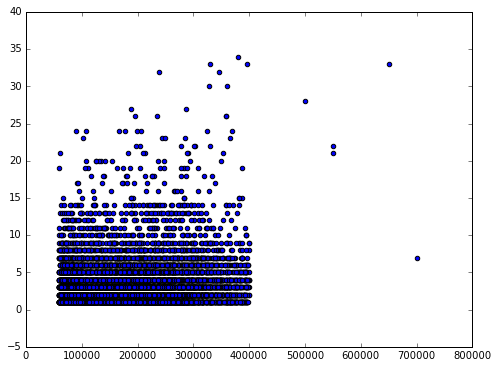

In [426]:
scatter(df['salary'], df['yrs_experience'])

In [434]:
# scatter(df['salary'], df['managing'])
# plt.xlim([0,420000])
# # plt.ylim([0,1000])

In [ ]:
# scatter(df['salary'], df['Bachelor'])

In [433]:
# scatter(df['salary'], df['PhD'])

In [432]:
# df['salary'].groupby(df['Bachelor']).mean()

In [431]:
# df['salary'].groupby(df['PhD']).mean()

In [435]:
df['salary'].groupby(df['sex']).mean()

sex
0    198975.924200
1    171314.518394
Name: salary, dtype: float64

In [436]:
def summary_model(X, y):
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return model, summary

In [443]:
X = df[[u'signing_bonus',
       u'degree_level', u'sex', u'yrs_experience', u'CEO', u'HR',
       u'engineering', u'marketing', u'sales']]
X = sm.add_constant(X) 
y = df['salary']

In [444]:
X.head()

,const,signing_bonus,degree_level,sex,yrs_experience,CEO,HR,engineering,marketing,sales
0,1,0,2,0,5,0.0,0.0,0.0,0.0,1.0
1,1,0,2,1,3,0.0,1.0,0.0,0.0,0.0
2,1,0,1,0,5,0.0,0.0,0.0,0.0,1.0
3,1,0,4,1,13,0.0,1.0,0.0,0.0,0.0
4,1,0,3,0,1,0.0,0.0,0.0,0.0,1.0


In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [446]:
md, summary = summary_model(X_train, y_train)

In [447]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     442.0
Date:                Tue, 02 Aug 2016   Prob (F-statistic):               0.00
Time:                        22:43:34   Log-Likelihood:                -84464.
No. Observations:                6699   AIC:                         1.689e+05
Df Residuals:                    6690   BIC:                         1.690e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const           2.294e+05   1.23e+04     18.620      0.000      2.05e+05  2.54e+05
signing_bonus   -959.0418   1966.771     -0.488      0.626     -4814.539  2896.456
degree_level    1039.8686    846.826      1.228      0.220      -620.180  2699.918
sex             -291.2389   1912.500     -0.152      0.879     -4040.349  3457.871
yrs_experience  1298.4115    291.776      4.450      0.000       726.438  1870.385
CEO             4.583e+05   6.04e+04      7.590      0.000       3.4e+05  5.77e+05
HR              -1.53e+05   1.22e+04    -12.502      0.000     -1.77e+05 -1.29e+05
engineering     7529.6130   1.22e+04      0.619      0.536     -1.63e+04  3.14e+04
marketing      -4.144e+04   1.22e+04     -3.399      0.001     -6.53e+04 -1.75e+04
sales          -4.191e+04   1.21e+04     -3.450      0.001     -6.57e+04 -1.81e+04
==============================================================================
Omnibus:                       25.578   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.803
Skew:                           0.149   Prob(JB):                     2.49e-06
Kurtosis:                       2.935   Cond. No.                     4.71e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [449]:
np.sum((md.predict(X_test) - y_test)**2)

16905520494875.117

In [450]:
np.sum((md.predict(X_train) - y_train)**2)

35080288333797.633